In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# list of models
# Commented few models because they produced very big results which interfere visualization
models = [#'RandomForestRegressor_metrics.csv',
          #'AdaBoostRegressor_metrics.csv',
          #'BaggingRegressor_metrics.csv',
          #'DecisionTreeRegressor_metrics.csv',
          'DummyRegressor_metrics_cross_validation.csv',
          'ExtraTreeRegressor_metrics_cross_validation.csv',
          #'ExtraTreesRegressor_metrics_cross_validation.csv',
          #'GaussianProcessRegressor_metrics.csv',
          #'GradientBoostingRegressor_metrics.csv',
          #'HuberRegressor_metrics.csv',
          #'KNeighborsRegressor_metrics.csv',
          #'MLPRegressor_metrics.csv',
          #'PassiveAggressiveRegressor_metrics.csv',
          #'RANSACRegressor_metrics.csv',
          #'SGDRegressor_metrics.csv',
          #'TheilSenRegressor_metrics.csv'
         ]

dataFrames = []

for model in models:
    data = pd.read_csv('../results-timeseries/' + model, index_col='Unnamed: 0')
    dataFrames.append(data)
    

In [12]:
# Generate different line styles
# 24 different different lines will be generated
lineStyles = ['-', '--', '-.', ':']
lineColors = ['b', 'g', 'r', 'c', 'm', 'y']
styles = []

for j in range(3):
    for i in range(5):
        styles.append(lineColors[i] + lineStyles[(i + j) % 4])

In [13]:
# MAPE,NMBE,CVRSME,RSQUARED possible arguments
# Creates visualization based on argument
def visualize(arg):
    dataList = []
    values = []
    for elem in dataFrames:
        
        dataList.append(elem[arg].values)

    for i in range(len(dataList)):
        values.append(dataList[i])
    lines = []
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(15,10))

    for i in range(len(models)):
        # Single line creator
        value, = plt.plot(values[i], styles[i], label=models[i])
        lines.append(value)

    plt.xlabel('Building')
    plt.ylabel(arg + ' value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

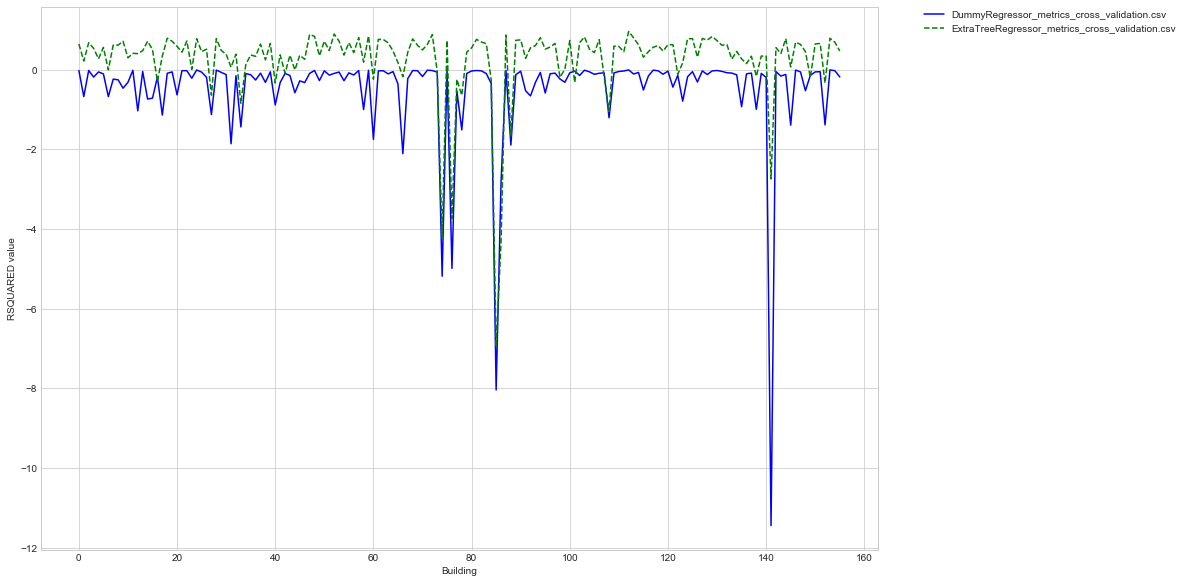

In [15]:
visualize('RSQUARED')